In [1]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib
import networkx as nx

## Venezia-Large

### Importing Useful Data

In [34]:
GEO_metadata = pd.read_csv('data_storage/images/GEO_metadata.csv', sep='\t', index_col='Unnamed: 0')

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_46332\3111682809.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GEO_metadata = pd.read_csv('data_storage/images/GEO_metadata.csv', sep='\t', index_col='Unnamed: 0')


In [3]:
metadata = pd.read_csv('data_storage/images/metadata.csv', sep='\t', index_col='Unnamed: 0')

In [4]:
GEO_metadata.columns

Index(['y', 'x', 'street_count', 'pr', 'bc', 'dg', 'cl', 'highway', 'geometry',
       'index', 'index.2', 'index.1', 'owner', 'owner_loc', 'title',
       'description', 'comments', 'taken', 'views', 'people', 'tags', 'lat',
       'lon', 'neighbourhood', 'url', 'candownload', 'local', 'tag_list',
       'tag_len', 'NOT', 'year', 'time', 'week', 'unique_week', 'English',
       'Italian', 'Other_Lang', 'num_sent', 'revised_text', 'text_data',
       'text_len', 'GEO_node', 'posts_num'],
      dtype='object')

In [5]:
GEO_metadata

,y,x,street_count,pr,bc,dg,cl,highway,geometry,index,...,unique_week,English,Italian,Other_Lang,num_sent,revised_text,text_data,text_len,GEO_node,posts_num
0,45.435812,12.335472,1,0.000063,0.000000,0.000342,0.005654,NaN,POINT (12.3354722 45.4358123),6,...,201012,0.0,0.0,0.0,12.0,It has title of Venice - Minelli Palace Courty...,El palacio Contarini del Bovolo (también llama...,236.0,49973409,2
1,45.435643,12.335290,3,0.000246,0.021225,0.001026,0.005649,NaN,POINT (12.3352903 45.4356434),7,...,201012,0.0,0.0,0.0,12.0,It has title of Venice - Minelli Palace. It ha...,El palacio Contarini del Bovolo (también llama...,234.0,49981281,2
2,45.437798,12.336022,3,0.000126,0.000000,0.000684,0.005971,NaN,POINT (12.3360219 45.4377985),10,...,202033,0.0,0.0,0.0,6.0,"It has tags of canalgrande, canal, bridge, pie...",Canal Grande on Venetsian pääliikenneväylä. Ku...,84.0,5128847037,26
3,45.437500,12.334590,3,0.000245,0.001504,0.001026,0.005941,NaN,POINT (12.3345897 45.4374995),11,...,202033,0.0,0.0,0.0,4.0,"It has tags of pier, italy, venice, gondola, c...",Corona-rajoitusten aikaan oli hyvä tilaisuus k...,80.0,4370729275,42
4,45.437222,12.333909,3,0.000262,0.001188,0.001026,0.005937,NaN,POINT (12.333909 45.4372222),12,...,202033,0.0,0.0,0.0,4.0,"It has tags of commercialbuildings, italy, ven...",Corona-rajoitusten aikaan oli hyvä tilaisuus k...,76.0,1840378053,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80958,45.444009,12.332236,1,0.000046,0.000000,0.000342,0.005174,NaN,POINT (12.3322356 45.444009),116670,...,201527,0.0,0.0,0.0,2.0,It has title of Here the packages are delivere...,"<a href=""http://www.brusatotrasporti.it/index....",35.0,5244439847,16
80959,45.444009,12.332236,1,0.000046,0.000000,0.000342,0.005174,NaN,POINT (12.3322356 45.444009),116671,...,201527,0.0,0.0,0.0,2.0,It has title of Door No.342. It has tags of Ve...,. It has title of Tür No.342. It has tags of v...,25.0,5244439847,16
80960,45.444009,12.332236,1,0.000046,0.000000,0.000342,0.005174,NaN,POINT (12.3322356 45.444009),116672,...,201527,0.0,0.0,0.0,2.0,It has title of Ave Maria. It has tags of Vene...,. It has title of Ave Maria. It has tags of ve...,26.0,5244439847,16
80961,45.444009,12.332236,1,0.000046,0.000000,0.000342,0.005174,NaN,POINT (12.3322356 45.444009),116673,...,201527,0.0,0.0,0.0,2.0,It has title of Kirchenportal der Church of Sa...,. It has title of Kirchenportal der Chiesa di ...,33.0,5244439847,16


In [3]:
GEO_nodes = pd.read_csv('data_storage/images/GEO_nodes.csv', sep='\t').set_index('osmid')
GEO_nodes

,y,x,street_count,pr,bc,dg,cl,highway,geometry
osmid,,,,,,,,,
27178184,45.438197,12.335686,4,0.000197,0.208517,0.001368,0.005999,NaN,POINT (12.3356863 45.4381974)
764403528,45.438128,12.335605,3,0.000175,0.025767,0.001026,0.005985,NaN,POINT (12.3356054 45.4381284)
1675825096,45.438233,12.335728,3,0.000186,0.048636,0.001026,0.005990,NaN,POINT (12.3357281 45.4382329)
8670969688,45.438255,12.335601,3,0.000111,0.207535,0.001026,0.005998,NaN,POINT (12.3356013 45.4382549)
5395065019,45.438053,12.335932,4,0.000236,0.196443,0.001368,0.006001,NaN,POINT (12.3359319 45.4380532)
...,...,...,...,...,...,...,...,...,...
9196476006,45.441902,12.307559,3,0.000119,0.000691,0.001026,0.004071,NaN,POINT (12.3075592 45.4419018)
9196521176,45.438670,12.326683,1,0.000077,0.000000,0.000342,0.005886,NaN,POINT (12.326683 45.4386701)
9221655954,45.467211,12.279144,1,0.000030,0.000000,0.000342,0.001992,NaN,POINT (12.2791441 45.467211)


In [7]:
def check_last_week(line):
    if line['week']>50:
        if line['taken'][5:7] == '01':
            return int(-100)
    return int(0)

In [8]:
GEO_metadata['week_adjust'] = GEO_metadata.apply(lambda x: check_last_week(x),axis=1)

In [9]:
metadata['week_adjust'] = metadata.apply(lambda x: check_last_week(x),axis=1)

In [10]:
GEO_metadata['adjusted_week'] = (GEO_metadata['unique_week'].astype(int) + GEO_metadata['week_adjust']).astype(str)

In [11]:
metadata['adjusted_week'] = (metadata['unique_week'].astype(int) + metadata['week_adjust']).astype(str)

In [12]:
metadata[metadata.week>50][['taken','unique_week','adjusted_week','week_adjust']]

,taken,unique_week,adjusted_week,week_adjust
28,2020-12-22 11:15:23,202052,202052,0
29,2020-12-23 18:13:12,202052,202052,0
30,2020-12-23 17:33:12,202052,202052,0
31,2020-12-23 17:21:30,202052,202052,0
1132,2017-01-01 00:00:00,201752,201652,-100
...,...,...,...,...
116651,2015-12-23 13:40:50,201552,201552,0
116652,2015-12-24 11:45:42,201552,201552,0
116653,2015-12-24 11:47:39,201552,201552,0
116654,2015-12-24 11:46:53,201552,201552,0


In [13]:
GEO_metadata.to_csv('data_storage/images/GEO_metadata.csv', sep='\t')

In [14]:
metadata.to_csv('data_storage/images/metadata.csv', sep='\t')

In [5]:
social_links = pd.read_csv('data_storage/images/social_links.csv', sep='\t').rename(columns={'Unnamed: 0': 'User0', 
                                                                                              'Unnamed: 1': 'User1'})

In [16]:
social_links

,User0,User1,self,friend,interest,mutual
0,148125504@N04,148125504@N04,1,1,1.000000,True
1,148125504@N04,32980384@N05,0,False,0.004769,False
2,148125504@N04,96038677@N06,0,False,0.000000,False
3,148125504@N04,88380809@N07,0,False,0.012162,False
4,148125504@N04,138486769@N02,0,False,0.033613,False
...,...,...,...,...,...,...
36929924,48150664@N07,46856873@N05,0,False,0.087719,False
36929925,48150664@N07,142199786@N05,0,False,0.000000,False
36929926,48150664@N07,132571827@N06,0,False,0.047859,False
36929927,48150664@N07,29127542@N04,0,False,0.000000,False


In [4]:
GEO_node_dist = pd.read_csv('data_storage/images/GEO_node_dist.csv', sep='\t', index_col='Unnamed: 0')

In [5]:
GEO_node_dist

,27178184,764403528,1675825096,8670969688,5395065019,27178422,223527689,1863759223,2962858842,4212293019,...,9127965093,9127993414,9128012220,9196476004,9196476007,9196476006,9196521176,9221655954,9379177140,9439079311
27178184,0.0,0.7,0.4,0.7,1.8,59.5,60.0,59.3,61.4,60.7,...,78.2,127.1,147.2,216.5,215.3,215.6,89.6,555.6,75.7,165.3
764403528,0.7,0.0,1.1,1.4,2.5,58.8,59.3,58.6,60.7,60.0,...,77.5,127.0,147.1,217.2,216.0,216.3,90.3,556.3,75.0,166.0
1675825096,0.4,1.1,0.0,1.1,2.2,59.9,60.4,59.7,61.8,61.1,...,78.6,127.5,147.6,216.8,215.6,215.9,89.9,555.9,76.1,165.6
8670969688,0.7,1.4,1.1,0.0,2.5,60.2,60.7,60.0,62.1,61.4,...,78.9,127.8,147.9,215.8,214.6,214.9,88.9,554.9,76.4,164.6
5395065019,1.8,2.5,2.2,2.5,0.0,57.7,58.2,57.5,59.6,58.9,...,76.4,125.3,145.4,218.3,217.1,217.4,91.4,557.4,73.9,167.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196476006,216.6,217.3,216.9,215.9,218.4,269.4,269.9,269.2,271.3,270.6,...,233.2,343.7,363.8,1.8,0.6,0.0,140.4,443.4,230.7,169.9
9196521176,89.6,90.3,89.9,88.9,91.4,149.1,149.6,148.9,151.0,150.3,...,132.3,216.7,236.8,140.3,139.1,139.4,0.0,479.4,129.8,102.2
9221655954,548.6,549.3,548.9,547.9,550.4,601.4,601.9,601.2,603.3,602.6,...,565.2,675.7,695.8,447.1,445.9,446.2,472.4,0.0,562.7,501.9
9379177140,75.7,75.0,76.1,76.4,73.9,48.3,48.8,48.1,50.2,49.5,...,4.9,141.0,161.1,230.6,229.4,229.7,129.8,569.7,0.0,224.0


In [33]:
5848-3549

2299

### Preparing a DataFrame to Contain the MultiGraph Infomation

In [19]:
All_Edges = pd.DataFrame([(a,b) for a in list(GEO_metadata['index.1']) for b in list(GEO_metadata['index.1']) if not a==b])
All_Edges

KeyboardInterrupt: 

### Temporal Graph
If two posts are consequent in a time flow, connects them with a temporal link

<AxesSubplot:>

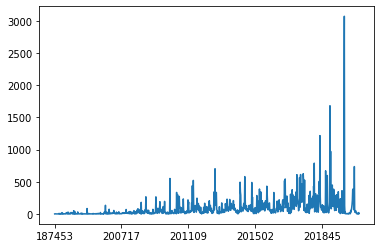

In [20]:
week_count = GEO_metadata['adjusted_week'].value_counts().sort_index()
week_count.plot()

In [21]:
temp_dict = {}
for i in range(len(week_count)):
    for j in range(len(week_count)):
        temp_dict[(week_count.index[i],week_count.index[j])] = abs(j-i)

In [22]:
temp_df = pd.DataFrame(temp_dict, ['dist']).T

In [23]:
temp_df

dist
187453 187453     0
       195452     1
       195517     2
       195953     3
       196521     4
...             ...
202053 202049     4
       202050     3
       202051     2
       202052     1
       202053     0

[831744 rows x 1 columns]

In [24]:
GEO_metadata['adjusted_week']

0       202205
1       202205
2       202205
3       202205
4       202205
         ...  
3132    201745
3133    201745
3134    201745
3135    201745
3136    202029
Name: adjusted_week, Length: 3137, dtype: object

In [25]:
All_Edges['Week_0'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[0]].reset_index()['adjusted_week']
All_Edges['Week_1'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[1]].reset_index()['adjusted_week']

In [26]:
All_Edges = All_Edges.merge(temp_df, how='left', left_on=['Week_0','Week_1'], right_index=True)

In [27]:
All_Edges

,0,1,Week_0,Week_1,dist
0,51859675789,51859339946,202205,202205,0
1,51859675789,51858385807,202205,202205,0
2,51859675789,51859339546,202205,202205,0
3,51859675789,51858385377,202205,202205,0
4,51859675789,51858385192,202205,202205,0
...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81
9837628,50150116276,38397950426,202029,201745,81
9837629,50150116276,38397948496,202029,201745,81
9837630,50150116276,38454117381,202029,201745,81


In [28]:
All_Edges['Temporal_Similarity'] = abs((2-All_Edges['dist'])/2*(All_Edges['dist']<2))

In [29]:
All_Edges['Temporal_Similarity'].value_counts()

0.0    9250976
0.5     295126
1.0     291530
Name: Temporal_Similarity, dtype: int64

In [30]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity
0,51859675789,51859339946,202205,202205,0,1.0
1,51859675789,51858385807,202205,202205,0,1.0
2,51859675789,51859339546,202205,202205,0,1.0
3,51859675789,51858385377,202205,202205,0,1.0
4,51859675789,51858385192,202205,202205,0,1.0
...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0
9837628,50150116276,38397950426,202029,201745,81,0.0
9837629,50150116276,38397948496,202029,201745,81,0.0
9837630,50150116276,38454117381,202029,201745,81,0.0


In [31]:
(All_Edges['Temporal_Similarity']>0).sum()

586656

In [32]:
(All_Edges['Temporal_Similarity']==1).sum()

291530

### Social Graph

In [24]:
social_links

,User0,User1,self,friend,interest,mutual
0,148125504@N04,148125504@N04,1,1,1.000000,True
1,148125504@N04,32980384@N05,0,False,0.004769,False
2,148125504@N04,96038677@N06,0,False,0.000000,False
3,148125504@N04,88380809@N07,0,False,0.012162,False
4,148125504@N04,138486769@N02,0,False,0.033613,False
...,...,...,...,...,...,...
36929924,48150664@N07,46856873@N05,0,False,0.087719,False
36929925,48150664@N07,142199786@N05,0,False,0.000000,False
36929926,48150664@N07,132571827@N06,0,False,0.047859,False
36929927,48150664@N07,29127542@N04,0,False,0.000000,False


C:\Users\zzbn1\AppData\Local\Temp\ipykernel_41904\2726203132.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)


<AxesSubplot:>

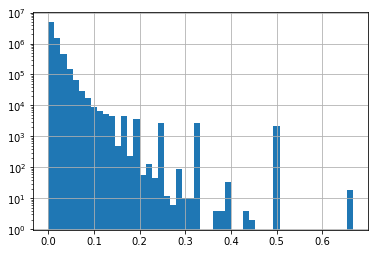

In [25]:
social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)

In [26]:
(social_links['interest']>0.05).sum()

187649

In [27]:
social_links['relationship'] = ((social_links['self'].astype(int)*2 + (social_links['friend']=='True').astype(int) + (social_links['interest']>0.05).astype(int))).astype(int)

In [28]:
social_links['relationship'].value_counts()

0    36726908
1      195264
3        6077
2        1680
Name: relationship, dtype: int64

In [29]:
social_links

,User0,User1,self,friend,interest,mutual,relationship
0,148125504@N04,148125504@N04,1,1,1.000000,True,3
1,148125504@N04,32980384@N05,0,False,0.004769,False,0
2,148125504@N04,96038677@N06,0,False,0.000000,False,0
3,148125504@N04,88380809@N07,0,False,0.012162,False,0
4,148125504@N04,138486769@N02,0,False,0.033613,False,0
...,...,...,...,...,...,...,...
36929924,48150664@N07,46856873@N05,0,False,0.087719,False,1
36929925,48150664@N07,142199786@N05,0,False,0.000000,False,0
36929926,48150664@N07,132571827@N06,0,False,0.047859,False,0
36929927,48150664@N07,29127542@N04,0,False,0.000000,False,0


In [30]:
H0 = nx.from_pandas_edgelist(social_links[social_links.relationship>0], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

In [31]:
H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_41904\454995413.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1',


In [32]:
len(H0.nodes)

6077

In [33]:
len(H1.nodes)

4361

In [34]:
len(H0.edges)

104549

In [35]:
len(H1.edges)

98472

In [36]:
nx.is_connected(H0)

False

In [37]:
nx.is_connected(H1)

False

In [38]:
nx.number_connected_components(H0)

1735

In [39]:
nx.number_connected_components(H1)

19

In [40]:
nx.density(H0)

0.005662951958533471

In [41]:
nx.density(H1)

0.01035786338037947

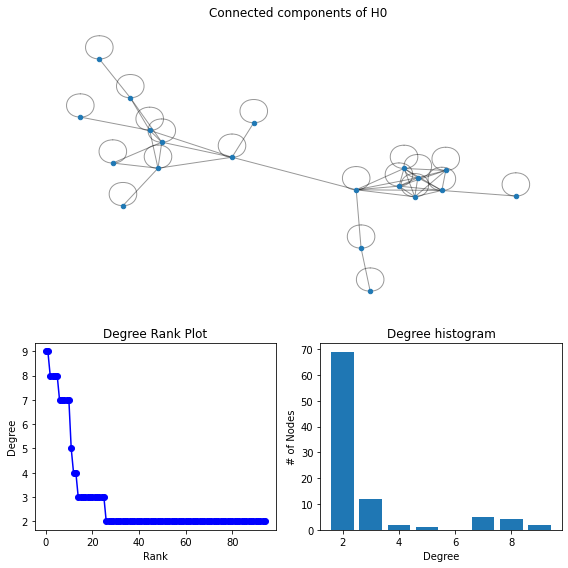

In [51]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H0.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H0.subgraph(sorted(nx.connected_components(H0), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of H0")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [42]:
size = [GEO_metadata.groupby('owner').count()['x'].loc[v] for v in H1]

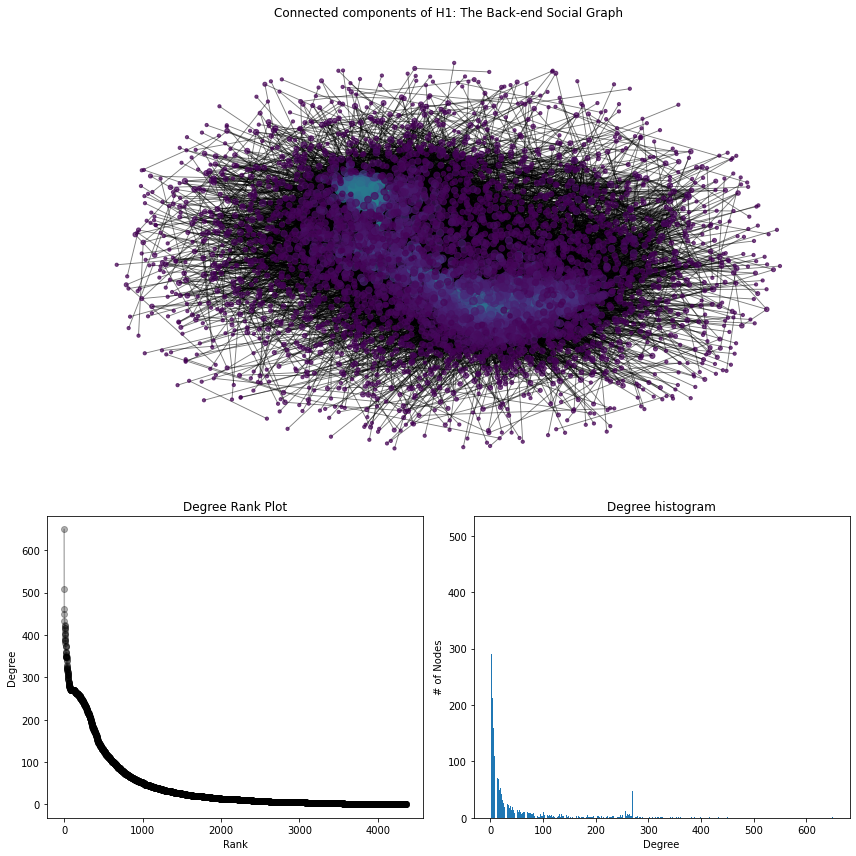

In [43]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.5, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("Connected components of H1: The Back-end Social Graph")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

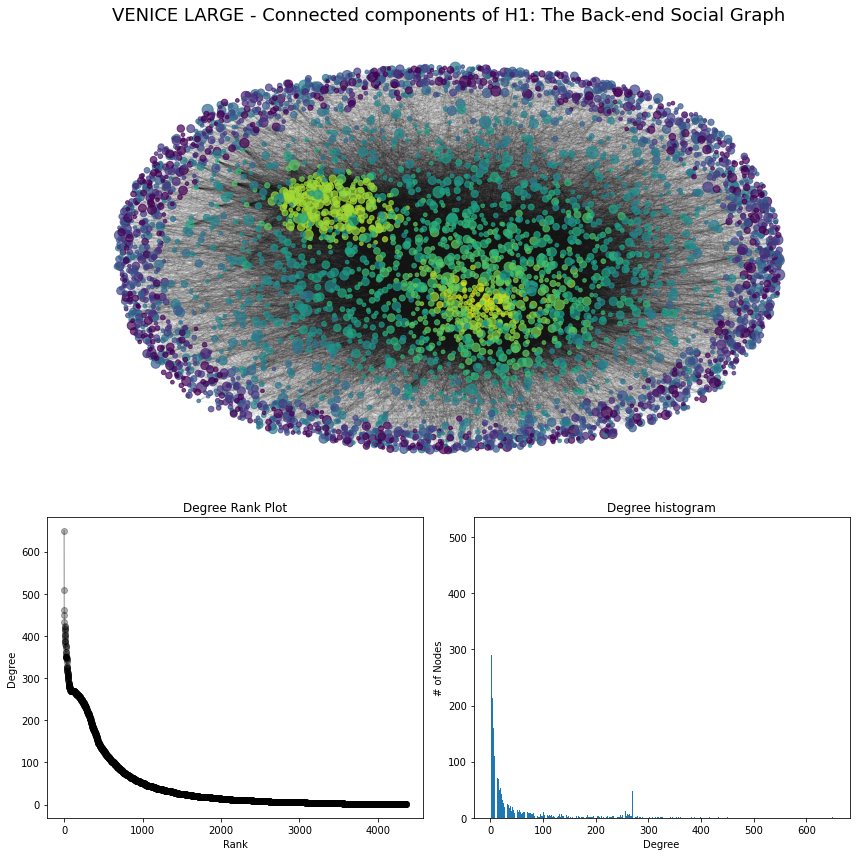

In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.5, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20*np.log(np.array(size)+1), 
                       node_color=[(np.log10(Gcc.degree(v))) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.05, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE LARGE - Connected components of H1: The Back-end Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


average shortest path length 2.695

length #paths
0 20
1 76
2 82
3 98
4 82
5 36
6 6
radius: 3
diameter: 6
center: ['44104611@N05']
periphery: ['117372933@N07', '193578629@N05', '128337749@N02', '90028379@N00']
density: 0.2


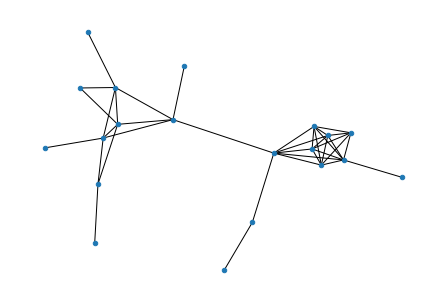

In [57]:
G=H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [58]:
social_links[['User0','User1','relationship']]

,User0,User1,relationship
0,57210421@N04,57210421@N04,3
1,57210421@N04,193578629@N05,0
2,57210421@N04,63829447@N04,0
3,57210421@N04,193769199@N05,0
4,57210421@N04,149416284@N07,0
...,...,...,...
9020,15047208@N00,91698536@N04,0
9021,15047208@N00,145667897@N08,0
9022,15047208@N00,152311060@N02,0
9023,15047208@N00,147141688@N03,0


In [59]:
All_Edges['User_0'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[0]].reset_index()['owner']
All_Edges['User_1'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[1]].reset_index()['owner']

In [60]:
All_Edges = All_Edges.merge(social_links[['User0','User1','relationship']], how='left', 
                                                 left_on=['User_0','User_1'], right_on = ['User0','User1'])

In [61]:
All_Edges = All_Edges.drop(['User0','User1'],axis=1)

In [62]:
All_Edges['Social_Similarity'] = All_Edges['relationship']/3

In [63]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333


In [64]:
(All_Edges['Social_Similarity']!=0).sum()

1205642

In [65]:
(All_Edges['Social_Similarity']==1).sum()

909664

### Spatial Graph

In [66]:
All_Edges['GEO_0'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[0]].reset_index()['GEO_node']
All_Edges['GEO_1'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[1]].reset_index()['GEO_node']

In [67]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
...,...,...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,8426347440
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832136


In [6]:
GEO_dict = {}
for i in GEO_node_dist.index:
    for j in GEO_node_dist.index:
        if (GEO_node_dist[str(i)][j] + GEO_node_dist[str(j)][i])/2<20:
            GEO_dict[(i,j)] = (GEO_node_dist[str(i)][j] + GEO_node_dist[str(j)][i])/2

In [7]:
GEO_df = pd.DataFrame(GEO_dict, ['geo_distance']).T

In [8]:
GEO_df

geo_distance
27178184   27178184             0.0
           764403528            0.7
           1675825096           0.4
           8670969688           0.7
           5395065019           1.8
...                             ...
9439079311 9439079313          11.6
           4838949798          13.3
           9439079312           6.8
           4838949799          19.4
           9439079311           0.0

[513396 rows x 1 columns]

<AxesSubplot:>

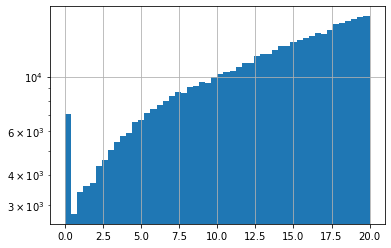

In [9]:
GEO_df[GEO_df['geo_distance']<50000]['geo_distance'].hist(log=True, bins=50)

In [10]:
GEO_df['geo_distance'].quantile(0.02)

0.8

In [11]:
(GEO_df['geo_distance']<20).sum()

513396

In [12]:
H2 = nx.from_pandas_edgelist(GEO_df[GEO_df['geo_distance']<20][GEO_df['geo_distance']>0].reset_index(), 
                             source='level_0', target='level_1', edge_attr=['geo_distance'])

In [13]:
temp = GEO_metadata.groupby('GEO_node').count()['x']

In [14]:
H3 = H2.subgraph(list(temp.index))

In [15]:
len(H2.nodes)

5778

In [16]:
len(H3.nodes)

3549

In [17]:
len(H2.edges)

253767

In [18]:
len(H3.edges)

120033

In [19]:
nx.is_connected(H2)

False

In [20]:
nx.is_connected(H3)

False

In [21]:
nx.number_connected_components(H2)

21

In [22]:
27178184 in temp

True

In [23]:
nx.number_connected_components(H3)

13

In [24]:
nx.density(H2)

0.015204958395729403

In [25]:
nx.density(H3)

0.01906518596311329

In [58]:
GEO_nodes

,y,x,street_count,pr,bc,dg,cl,highway,geometry
osmid,,,,,,,,,
27178184,45.438197,12.335686,4,0.000197,0.208517,0.001368,0.005999,NaN,POINT (12.3356863 45.4381974)
764403528,45.438128,12.335605,3,0.000175,0.025767,0.001026,0.005985,NaN,POINT (12.3356054 45.4381284)
1675825096,45.438233,12.335728,3,0.000186,0.048636,0.001026,0.005990,NaN,POINT (12.3357281 45.4382329)
8670969688,45.438255,12.335601,3,0.000111,0.207535,0.001026,0.005998,NaN,POINT (12.3356013 45.4382549)
5395065019,45.438053,12.335932,4,0.000236,0.196443,0.001368,0.006001,NaN,POINT (12.3359319 45.4380532)
...,...,...,...,...,...,...,...,...,...
9196476006,45.441902,12.307559,3,0.000119,0.000691,0.001026,0.004071,NaN,POINT (12.3075592 45.4419018)
9196521176,45.438670,12.326683,1,0.000077,0.000000,0.000342,0.005886,NaN,POINT (12.326683 45.4386701)
9221655954,45.467211,12.279144,1,0.000030,0.000000,0.000342,0.001992,NaN,POINT (12.2791441 45.467211)


In [35]:
len(GEO_metadata['GEO_node'].unique())

3571

In [27]:
size = [GEO_metadata.groupby('GEO_node').count()['x'].loc[v] if v in temp else 0 for v in H3]

In [28]:
size_p = -np.array(size)
size_p.sort()
size_p = -size_p

In [29]:
len(size)

3549

In [77]:
len([10*np.log(Gcc.degree(v)+1) for v in Gcc])

4361

In [30]:
Gcc = H3.subgraph(sorted(nx.connected_components(H3), key=len, reverse=True)[0])
size_cc = [GEO_metadata.groupby('GEO_node').count()['x'].loc[v] if v in temp else 0 for v in Gcc]

In [31]:
size_p = -np.array(size_cc)
size_p.sort()
size_p = -size_p

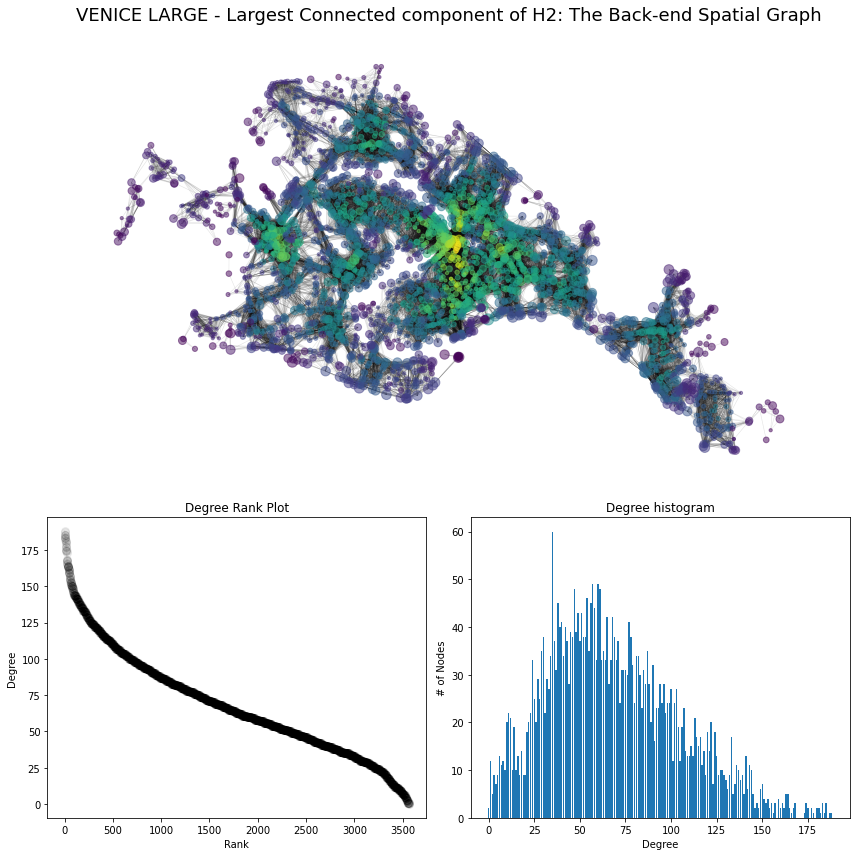

In [106]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H3.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H3.subgraph(sorted(nx.connected_components(H3), key=len, reverse=True)[0])
#Gcc = H3
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H3}
pos_1 = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in Gcc}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos_1, ax=ax0, node_size=np.log(np.array(size_cc)+1)*15, 
                       node_color=[(0.1*Gcc.degree(v, weight='geo_distance')) for v in Gcc], alpha=0.5)
nx.draw_networkx_edges(Gcc, pos_1, ax=ax0, alpha=0.1, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE LARGE - Largest Connected component of H2: The Back-end Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.05,marker="o", markersize=8)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

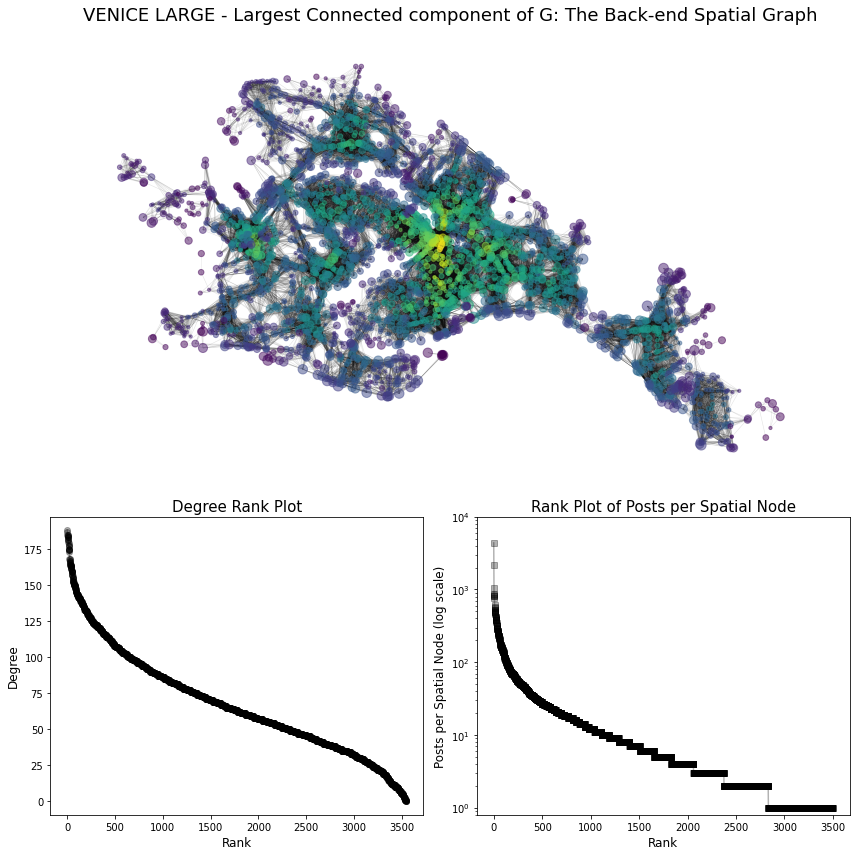

In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H3.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H3.subgraph(sorted(nx.connected_components(H3), key=len, reverse=True)[0])
#Gcc = H3
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H3}
pos_1 = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in Gcc}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos_1, ax=ax0, node_size=np.log(np.array(size_cc)+1)*15, 
                       node_color=[(0.1*Gcc.degree(v, weight='geo_distance')) for v in Gcc], alpha=0.5)
nx.draw_networkx_edges(Gcc, pos_1, ax=ax0, alpha=0.1, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE LARGE - Largest Connected component of G: The Back-end Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot",size=15)
ax1.set_ylabel("Degree",size=12)
ax1.set_xlabel("Rank",size=12)

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(size_p, "k-", alpha=0.3, marker="s")
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per Spatial Node",size=15)
ax2.set_xlabel("Rank",size=12)
ax2.set_ylim(0.8,10000)
ax2.set_ylabel("Posts per Spatial Node (log scale)",size=12)

fig.tight_layout()
plt.show()


average shortest path length 4.470743801652892

length #paths
0 55
1 414
2 402
3 392
4 390
5 338
6 324
7 240
8 182
9 162
10 68
11 34
12 24
radius: 6
diameter: 12
center: [4713823520, 3762442398]
periphery: [7745754911, 7745754912, 4451401528, 4778201457, 4778201460, 4451401595, 4926191871]
density: 0.1393939393939394


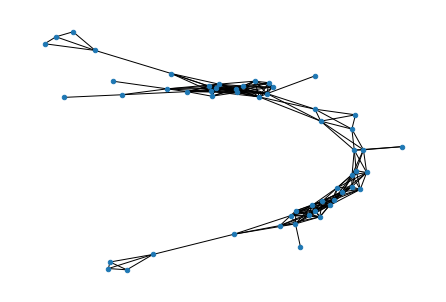

In [86]:
G=H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [87]:
All_Edges = All_Edges.merge(GEO_df, how='left', left_on=['GEO_0','GEO_1'], right_index=True)

In [88]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1,geo_distance
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,8426347440,611.3
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.2
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.2
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832136,601.8


<AxesSubplot:>

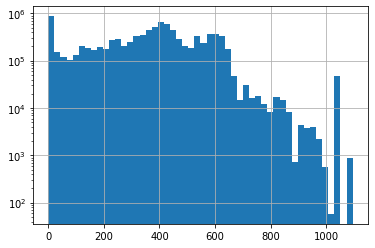

In [89]:
All_Edges[All_Edges.geo_distance<50000]['geo_distance'].hist(log=True, bins=50)

In [90]:
All_Edges['Spatial_Similarity'] = abs((20-All_Edges['geo_distance'])/20 * (All_Edges['geo_distance']<=20))

In [91]:
All_Edges['One_Edge'] = (All_Edges['Spatial_Similarity']+All_Edges['Social_Similarity']+All_Edges['Temporal_Similarity'])>0

In [92]:
All_Edges['Same_Node'] = All_Edges[0]==All_Edges[1]

In [93]:
All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_45124\3347584611.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]


In [94]:
All_Edges_Graph

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1,geo_distance,Spatial_Similarity,One_Edge,Same_Node
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0,1.0,True,False
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0,1.0,True,False
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0,1.0,True,False
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0,1.0,True,False
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.0,1.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,8426347440,611.3,0.0,True,False
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.2,0.0,True,False
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.2,0.0,True,False
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832136,601.8,0.0,True,False


In [95]:
(All_Edges_Graph['Spatial_Similarity']!=0).sum()

850005

In [96]:
(All_Edges_Graph['Spatial_Similarity']==1).sum()

778408

In [97]:
All_Edges_Graph.to_csv('Suzhou/data_storage/Edge_List.csv', sep='\t')

### Construction and Analysis on Graphs

In [98]:
G1 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0][[0,1,'Temporal_Similarity','Week_0','Week_1']], 
                             source=0, target=1,edge_attr=['Temporal_Similarity','Week_0','Week_1'])

In [99]:
len(G1.nodes)

3137

In [100]:
len(G1.edges)

293323

In [101]:
nx.is_connected(G1)

True

In [102]:
nx.density(G1)

0.05963284660373553

In [103]:
pos_1 = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}

In [104]:
G2 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Social_Similarity>0][[0,1,'Social_Similarity','User_0','User_1','relationship']], 
                             source=0, target=1,edge_attr=['Social_Similarity','User_0','User_1','relationship'])

In [105]:
len(G2.nodes)

3120

In [106]:
len(G2.edges)

602815

In [107]:
nx.is_connected(G2)

False

In [108]:
nx.number_connected_components(G2)

56

In [109]:
nx.density(G2)

0.12389223205991401

In [110]:
G3 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0][[0,1,'Spatial_Similarity','GEO_0','GEO_1','geo_distance']], 
                             source=0, target=1,edge_attr=['Spatial_Similarity','GEO_0','GEO_1','geo_distance'])

In [111]:
len(G3.nodes)

3115

In [112]:
len(G3.edges)

435004

In [113]:
nx.is_connected(G3)

False

In [114]:
nx.number_connected_components(G3)

78

In [115]:
nx.density(G3)

0.08969052928265762

In [116]:
G = nx.MultiGraph()

In [117]:
G = nx.compose(nx.compose(G1,G2),G3)

In [118]:
len(G.nodes)

3137

In [119]:
len(G.edges)

930052

In [120]:
nx.is_connected(G)

True

In [121]:
nx.density(G)

0.18908046163954903

In [122]:
pos = nx.spring_layout(G, seed=10396953, k=1)

In [123]:
len(pos)

3137

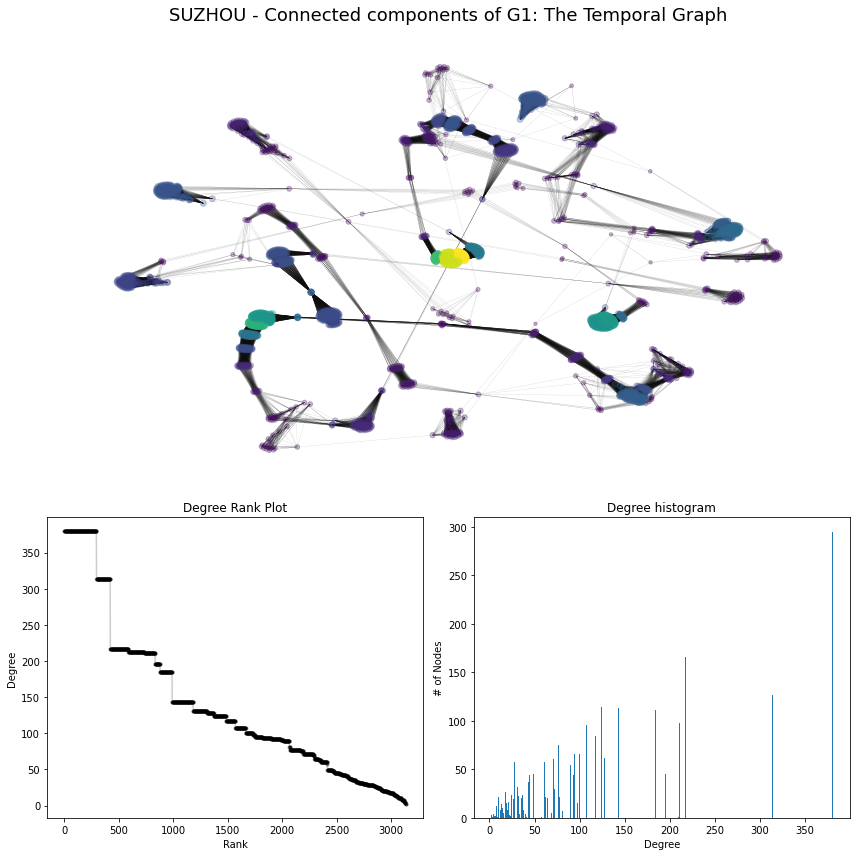

In [124]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
Gcc = G1
pos_2 = nx.spring_layout(G1, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Temporal_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G1: The Temporal Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

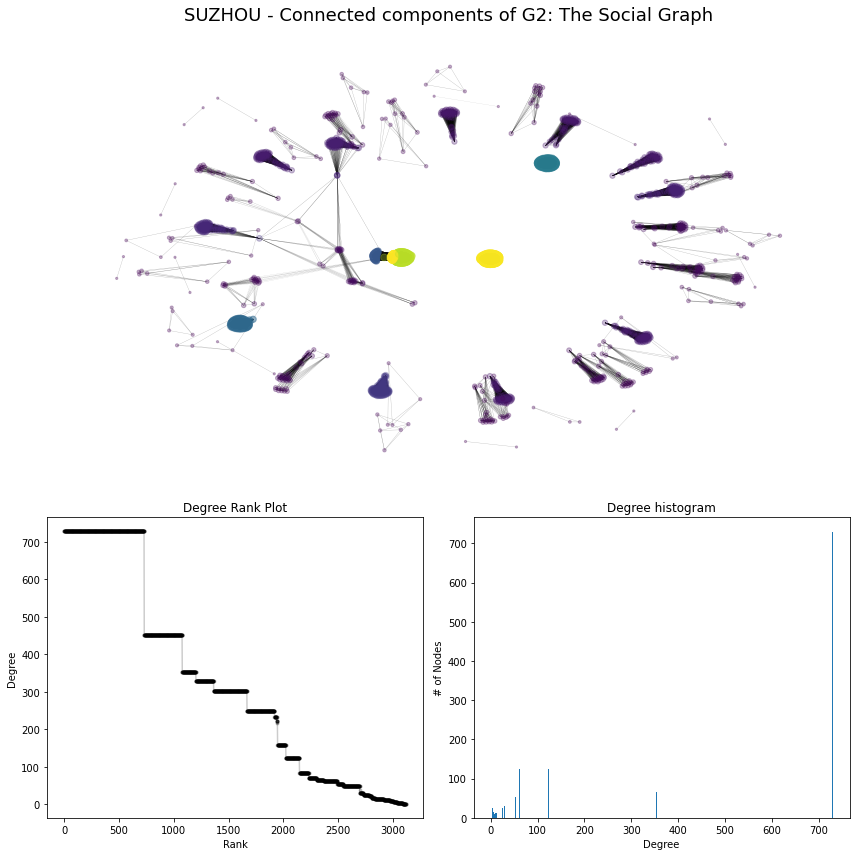

In [125]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G2.subgraph(sorted(nx.connected_components(G2), key=len, reverse=True)[0])
Gcc = G2
pos_2 = nx.spring_layout(G2, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Social_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G2: The Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

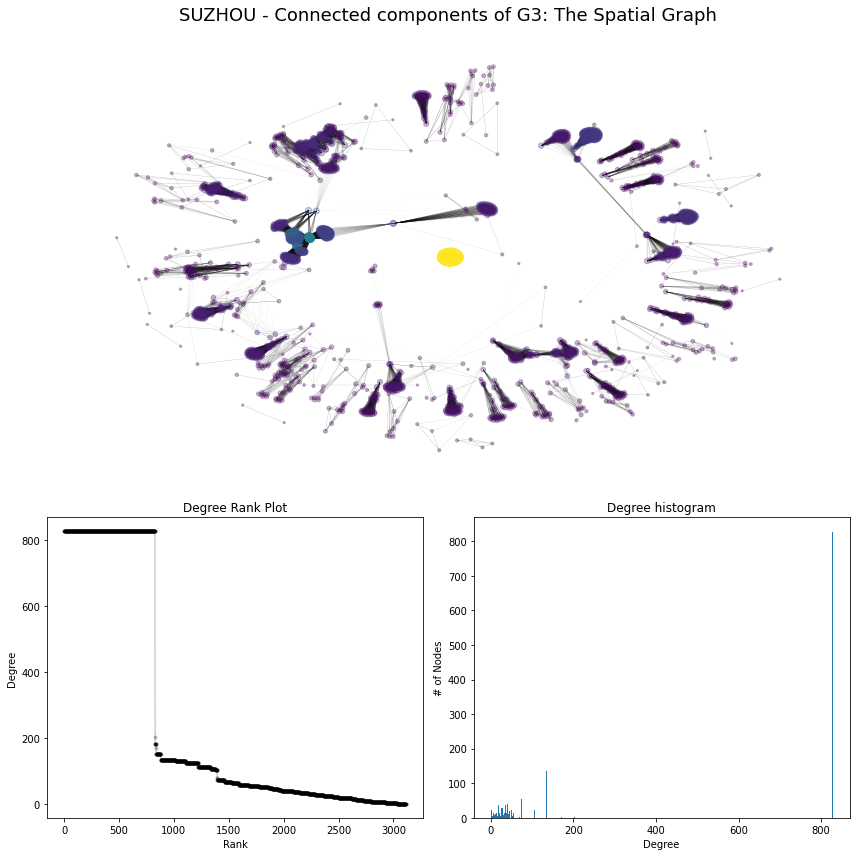

In [126]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G3.subgraph(sorted(nx.connected_components(G3), key=len, reverse=True)[0])
Gcc = G3
pos_2 = nx.spring_layout(G3, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Spatial_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G3: The Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [127]:
GM = nx.MultiGraph()

In [128]:
GM.add_weighted_edges_from([e for e in G1.edges(data=True)])
GM.add_weighted_edges_from([e for e in G2.edges(data=True)])
GM.add_weighted_edges_from([e for e in G3.edges(data=True)])

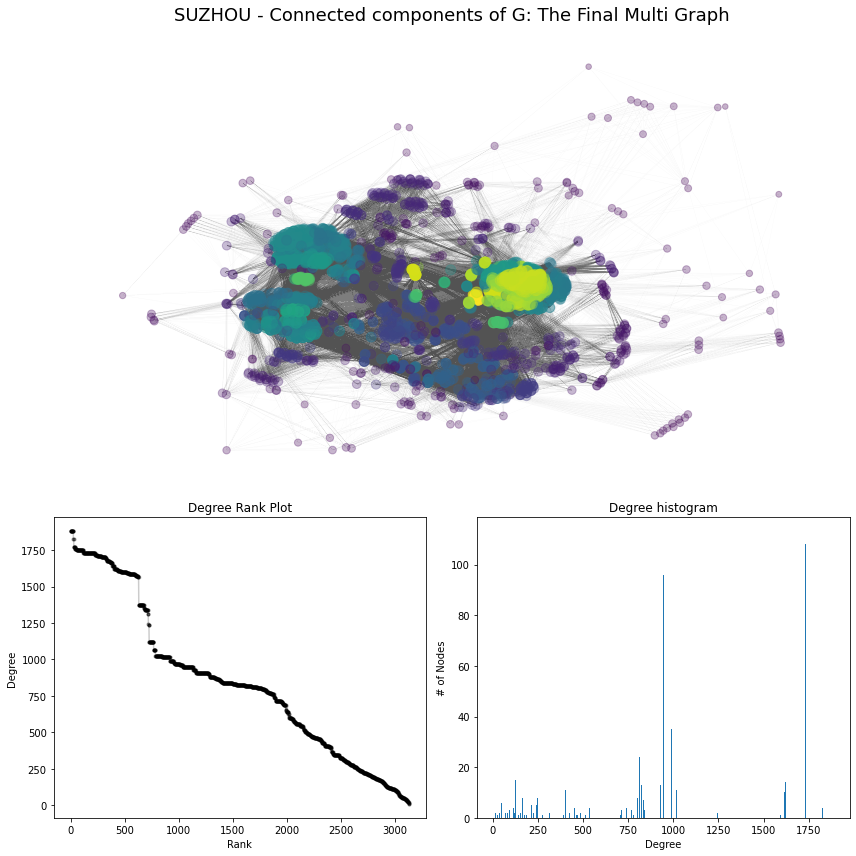

In [129]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in GM.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = GM.subgraph(sorted(nx.connected_components(GM), key=len, reverse=True)[0])
Gcc = GM
pos_2 = nx.spring_layout(G, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.03, width = [0.1*len(e) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G: The Final Multi Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [130]:
len(GM.nodes)

3137

In [131]:
len(GM.edges)

1331142

In [132]:
nx.density(GM)

0.2706224424739612

In [133]:
nx.is_connected(GM)

True

In [134]:
nx.is_weighted(GM)

True

In [135]:
nx.is_weighted(G2)

False

In [183]:
A1 = nx.adjacency_matrix(G1, weight='Temporal_Similarity')
A2 = nx.adjacency_matrix(G2, weight='Social_Similarity')
A3 = nx.adjacency_matrix(G3, weight='Spatial_Similarity')